In [1]:
import numpy as np
import pandas as pd
import data_helper
import matplotlib.pyplot as plt
from sklearn import linear_model

## Cargando los Datos

### Descripcion de los Datos

**Area_Lote**: Area del lote en metros cuadrados

**Precio**: Precio total de la propiedad en Quetzales

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head(10)

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233
5,8.3829,11.8860
6,7.4764,4.3483
7,8.5781,12.0000
8,6.4862,6.5987
9,5.0546,3.8166


# Modelos de Regresion Lineal

### Modelo 1  
$y = 2.41262565 x + 107748.55024667$

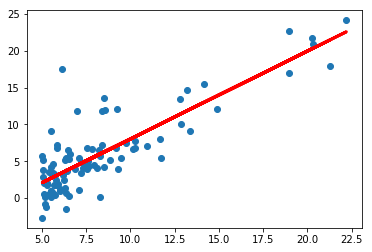

In [4]:
reg = linear_model.LinearRegression()

x = data['x'].values.reshape(-1, 1)
y = data['y'].values

reg.fit(x,y)

y_hat = reg.predict(x)

plt.scatter(x, y)
plt.plot( x, y_hat, color='red', linewidth=3)
plt.show()

In [5]:
m = reg.coef_[0]
b = reg.intercept_
print(' y = {0} * x  {1}'.format(m, b))

 y = 1.193033644189594 * x  -3.8957808783118537


# Batch Gradient Descent


In [6]:
x_df = pd.DataFrame(data.x)
y_df = pd.DataFrame(data.y)

### Costo
$\operatorname {Costo} ={\frac {1}{2m}}\sum _{i=1}^{m}(h_{\theta}(x)-Y_{i})^{2}$

In [7]:
def cost_function(x, y, theta_1, theta_0):

    m = len(y)
    
    x_def = pd.DataFrame(data.x)
    y_def = pd.DataFrame(data.y)
    
    h = theta_1*x+theta_0
    costo = np.sum((h-y)**2)/(2*m)

    return costo

#### Probando la funcion de costo
En esta celda vamos a probar la funcion de costo, para los valores de 

$\theta_{0} =  -3.8957808783118537$

$\theta_{1} = 1.193033644189594$

Debemos obtener el valor de 4.476971375975179

In [8]:
theta_0 = -3.8957808783118537
theta_1 = 1.193033644189594

x_def = pd.DataFrame(data.x)
y_def = pd.DataFrame(data.y)
    
x = np.array(x_def).flatten()
y = np.array(y_def).flatten()

cost_function(x, y, theta_1, theta_0)

4.4769713759751788

### Batch Gradient Descent

Derivada de la funcion de costo:
$\frac{\partial}{\partial \theta} J(\theta) = (h_{\theta}(x)-y) \cdot x_{j} $

En cada repeticion:

$\theta_{0} := \theta_{0} - \alpha {\frac {1}{m}} \sum _{i=1}^{m} (h_{\theta}(x)-y) $

$\theta_{1} := \theta_{1} - \alpha {\frac {1}{m}} \sum _{i=1}^{m} (h_{\theta}(x)-y) \cdot x_{j} $

Iteracion:  0
Costo:  6.73719046487


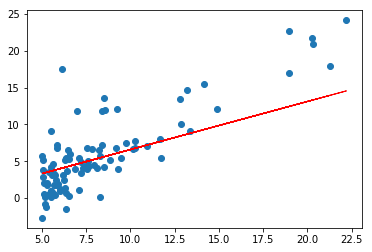

Iteracion:  20
Costo:  5.81081784263


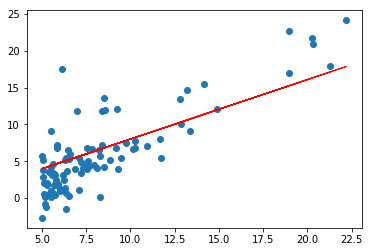

Iteracion:  40
Costo:  5.71794710733


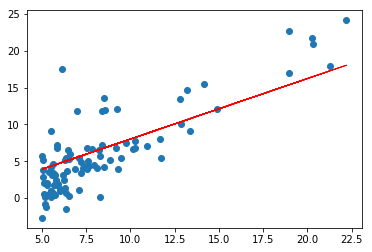

Iteracion:  60
Costo:  5.63154261361


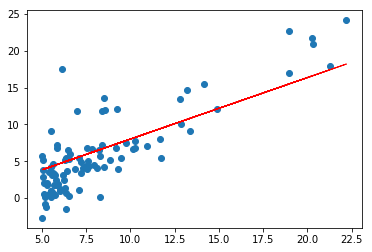

Iteracion:  80
Costo:  5.55115414127


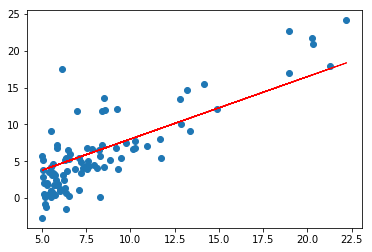

Iteracion:  100
Costo:  5.47636281727


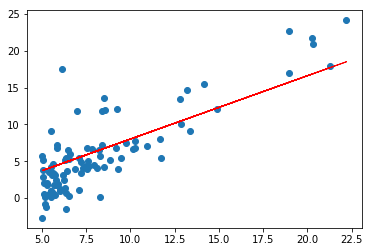

Iteracion:  120
Costo:  5.40677893313


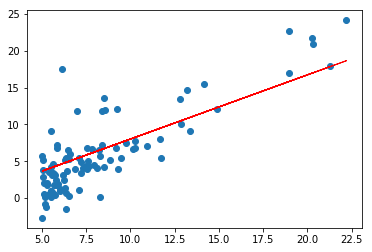

Iteracion:  140
Costo:  5.3420399143


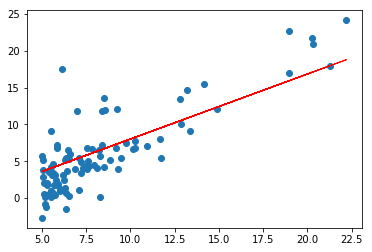

Iteracion:  160
Costo:  5.28180843096


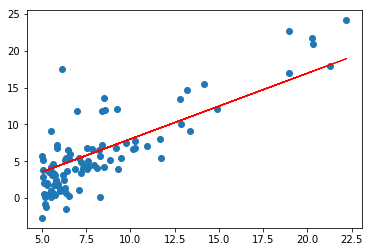

Iteracion:  180
Costo:  5.22577064029


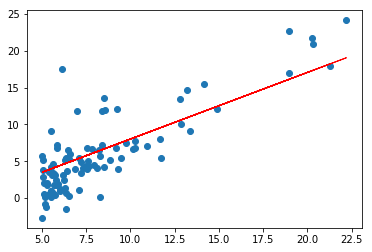

-1.1245018113 0.914628602347
5.17615296289


In [11]:
x = np.array(x_def).flatten()
y = np.array(y_def).flatten()

theta_0 = 0
theta_1 = 0

### ingresa el numero de iteracions y el valor de alpha ###
iterations = 200
alpha = 0.01


m = len(y) 


for iteration in range(iterations):
    h = theta_1*x  + theta_0
    
    '''
    ## Implementa tu codigo aqui #####
    Calcula los valores de theta0 y theta1
    '''
    theta_0_temporal = theta_0-(alpha*(1/(m))* (np.sum(np.subtract(h,y))) )
    
    theta_1_temporal = theta_1-(alpha*(1/(m))* (np.sum(np.subtract(h,y)*x)))
    
    theta_0 = theta_0_temporal
    theta_1 = theta_1_temporal
    
    '''
    ## Implementa tu codigo aqui ####
    Utiliza la funcion de costo para 
    '''
    cost = cost_function(x, y, theta_1, theta_0)
    
    ## No modifiques nada desde este punto #####
    if(iteration % 20 == 0):
        print('Iteracion: ', iteration)
        print('Costo: ', cost)
        h = theta_1*x  + theta_0
        plt.scatter(x, y)
        plt.plot( x, h, color='red', linewidth=1)
        plt.show()
        
        
print(theta_0, theta_1) 
print(cost)

# Gradient Descent con Scikit Learn

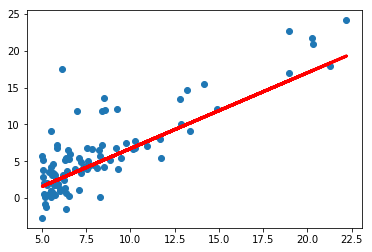

In [59]:
import numpy as np
from sklearn import linear_model


x = data['x'].values.reshape(-1, 1)
y = data['y'].values

clf = linear_model.SGDRegressor(alpha=0.01, loss='squared_loss', max_iter=100)
clf.fit(x, y)

y_hat = clf.predict(x)

plt.scatter(x, y)
plt.plot( x, y_hat, color='red', linewidth=3)
plt.show()